In [4]:
# loading mnist

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    

In [7]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1,cache=True)
mnist.target = mnist.target.astype(np.int8)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([5, 0, 4, ..., 4, 5, 6], dtype=int8),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'p

In [8]:
dir(mnist)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

In [10]:
print(mnist.target)

[5 0 4 ... 4 5 6]


In [11]:
print(mnist.details)

{'id': '554', 'name': 'mnist_784', 'version': '1', 'format': 'ARFF', 'upload_date': '2014-09-29T03:28:38', 'licence': 'Public', 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'status': 'active', 'processing_date': '2018-10-03 21:23:30', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


In [12]:
sort_by_target(mnist)

In [13]:
print(mnist["target"])

[0 0 0 ... 9 9 9]


In [15]:
print(mnist.target)
# sorted

print(mnist.data.shape)

[0 0 0 ... 9 9 9]
(70000, 784)


In [16]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [17]:
y.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

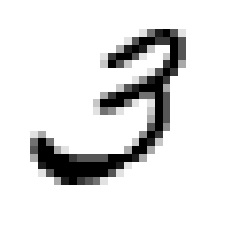

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib as mpl
some_digit = X[23240]
some_digit.shape
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
#plt.show()

In [27]:
def plot_image(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [28]:
# extra

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1)// images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

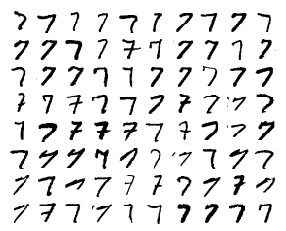

In [32]:
plot_digits(X[42000:42080])